In [1]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

zephyr7b = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')

zephyr7b

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
zephyr7b.head().style.background_gradient(cmap = 'viridis')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
zephyr7b.tail().style.background_gradient(cmap = 'viridis')

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
zephyr7b.shape

(200, 5)

In [5]:
zephyr7b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
zephyr7b.describe().style.background_gradient(cmap = 'viridis')

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
zephyr7b.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
zephyr7b.drop(['CustomerID','Gender'],axis =1,inplace = True)

zephyr7b

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [9]:
x = zephyr7b.iloc[:,:]

x

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


**Elbow Technique**

In [10]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):

    data = KMeans(n_clusters=i,init = 'k-means++', random_state = 42)

    data.fit(x)

    wcss.append(data.inertia_)

In [11]:
print(wcss)

[308812.78, 212840.16982097193, 143342.751571706, 104366.15145556198, 75378.76464074483, 58302.40630860368, 51118.9499316473, 44312.46881207722, 40894.989782139775, 37468.515715765716]


In [12]:
len(wcss)

10

Text(0.5, 1.0, 'Elbow Technique')

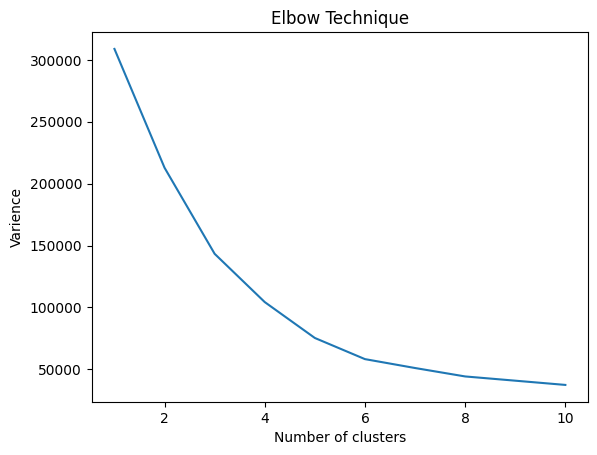

In [13]:
plt.plot(range(1,11),wcss)

plt.xlabel('Number of clusters')

plt.ylabel('Varience')

plt.title('Elbow Technique')

#1-10 x  y-value= wcss

In [14]:
model = KMeans(n_clusters = 6 , init= 'k-means++',random_state = 42)

y_means = model.fit_predict(x)

y_means

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 4,
       0, 3, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 1, 4, 1, 5, 1, 5, 1, 5, 1,
       4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 4, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1,
       5, 1], dtype=int32)

In [15]:
zephyr7b['cluster']=y_means

zephyr7b

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,0
1,21,15,81,3
2,20,16,6,0
3,23,16,77,3
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,5
197,32,126,74,1
198,32,137,18,5


In [16]:
zephyr7b.isna().sum()

Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
cluster                   0
dtype: int64

In [17]:
zephyr7b.dtypes

Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
cluster                   int32
dtype: object

In [18]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y= train_test_split(x,y_means,test_size = 0.3,random_state = 42)

train_x

,Age,Annual Income (k$),Spending Score (1-100)
169,32,87,63
97,27,60,50
31,21,30,73
12,58,20,15
35,21,33,81
...,...,...,...
106,66,63,50
14,37,20,13
92,48,60,49
179,35,93,90


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(train_x)

train_x = scaler.transform(train_x)

test_x = scaler.transform(test_x)

train_x

array([[-0.47625237,  0.98322099,  0.4438231 ],
       [-0.83128609, -0.01051573, -0.05203819],
       [-1.25732655, -1.11466765,  0.82525485],
       [ 1.36992295, -1.48271829, -1.38704935],
       [-1.25732655, -1.00425246,  1.13040026],
       [ 0.80186901,  0.24711972,  0.21496404],
       [ 0.65985552, -0.78342208, -0.58604265],
       [-0.1922254 ,  1.57210202,  1.28297297],
       [ 2.07999038, -0.0473208 ,  0.13867769],
       [ 0.37582855,  0.4679501 , -1.69219475],
       [-0.40524563, -0.67300688,  0.32939357],
       [ 0.09180158,  0.39433997,  1.66440472],
       [-1.39934003,  0.76239061, -1.7684811 ],
       [-1.04430632, -0.82022714,  1.5499752 ],
       [ 0.87287575,  0.24711972, -0.31904042],
       [-1.39934003,  0.13670452, -0.20461089],
       [ 0.44683529, -1.18827778, -0.73861536],
       [-0.26323214,  0.50475516,  0.78711168],
       [-1.11531306,  0.0630944 , -0.39532677],
       [-1.39934003,  0.09989946,  0.10053451],
       [-1.32833329, -1.62993855, -1.730

In [20]:
from sklearn.neighbors import KNeighborsClassifier

gemini = KNeighborsClassifier(n_neighbors=7)

gemini.fit(train_x,train_y)

turbo = gemini.predict(test_x)

turbo

array([4, 3, 0, 5, 5, 4, 4, 5, 5, 3, 2, 5, 1, 4, 5, 1, 2, 5, 2, 4, 4, 0,
       5, 4, 4, 2, 4, 2, 1, 4, 3, 0, 2, 4, 5, 2, 1, 1, 5, 2, 2, 1, 0, 0,
       4, 1, 3, 3, 1, 2, 4, 1, 3, 2, 2, 2, 5, 2, 5, 2], dtype=int32)

In [21]:
test_y

array([4, 3, 0, 5, 5, 4, 4, 5, 5, 3, 2, 5, 1, 4, 5, 1, 2, 5, 2, 4, 4, 0,
       5, 4, 4, 2, 4, 2, 1, 4, 3, 0, 2, 4, 5, 2, 1, 1, 5, 2, 2, 1, 0, 0,
       4, 1, 3, 3, 1, 2, 4, 1, 3, 5, 2, 2, 5, 2, 5, 2], dtype=int32)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

scala = confusion_matrix(test_y,turbo)

score = accuracy_score(test_y,turbo)

print(scala)

score


[[ 5  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0  6  0  0]
 [ 0  0  0  0 13  0]
 [ 0  0  1  0  0 12]]


0.9833333333333333

In [23]:
from sklearn.metrics import classification_report

print(classification_report(test_y,turbo))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         9
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00        13
           5       1.00      0.92      0.96        13

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



In [24]:
zephyr7b

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,0
1,21,15,81,3
2,20,16,6,0
3,23,16,77,3
4,31,17,40,0
...,...,...,...,...
195,35,120,79,1
196,45,126,28,5
197,32,126,74,1
198,32,137,18,5


In [25]:
prediction = gemini.predict(scaler.transform([[19,130,70,1]]))

prediction

ValueError: X has 4 features, but StandardScaler is expecting 3 features as input.